# Import all required Libraries

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score,f1_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
import nltk
from nltk import word_tokenize

# Loading the dataset

In [2]:
# loading the training data set
train_data=pd.read_csv('twitter_training.csv')
# Loading the testing data set
test_data=pd.read_csv('twitter_validation.csv')

In [3]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
# adding columns heading to the data set
train_data.columns=['id','information','label','tweet']
test_data.columns=['id','information','label','tweet']

In [5]:
train_data.head()

,id,information,label,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
test_data.head()

,id,information,label,tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


# Preprocessing the data

# For training data

In [7]:
# converting tweets into lowercase
train_data['cleaned_tweet']=train_data['tweet'].str.lower()
# converting all cleaned_tweets into strings
train_data['cleaned_tweet']=[str(data) for data in train_data['cleaned_tweet']]
# removing unwanted special characters
train_data['cleaned_tweet']=train_data['cleaned_tweet'].str.replace('[^A-Za-z0-9 ]+',' ',regex=True)

# For testing data

In [8]:
# converting tweets into lowercase
test_data['cleaned_tweet']=test_data['tweet'].str.lower()
# converting all cleaned_tweets into strings
test_data['cleaned_tweet']=[str(data) for data in test_data['cleaned_tweet']]
# removing unwanted special characters
test_data['cleaned_tweet']=test_data['cleaned_tweet'].str.replace('[^A-Za-z0-9 ]+',' ',regex=True)

In [9]:
train_data.head()

,id,information,label,tweet,cleaned_tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [10]:
test_data.head()

,id,information,label,tweet,cleaned_tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp i ve had madeleine mccann in my cel...


In [11]:
train_data['label'].value_counts()

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: label, dtype: int64

In [12]:
test_data['label'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: label, dtype: int64

# Exploratory Data Analysis

# Plotting wordcloud for positive tweets

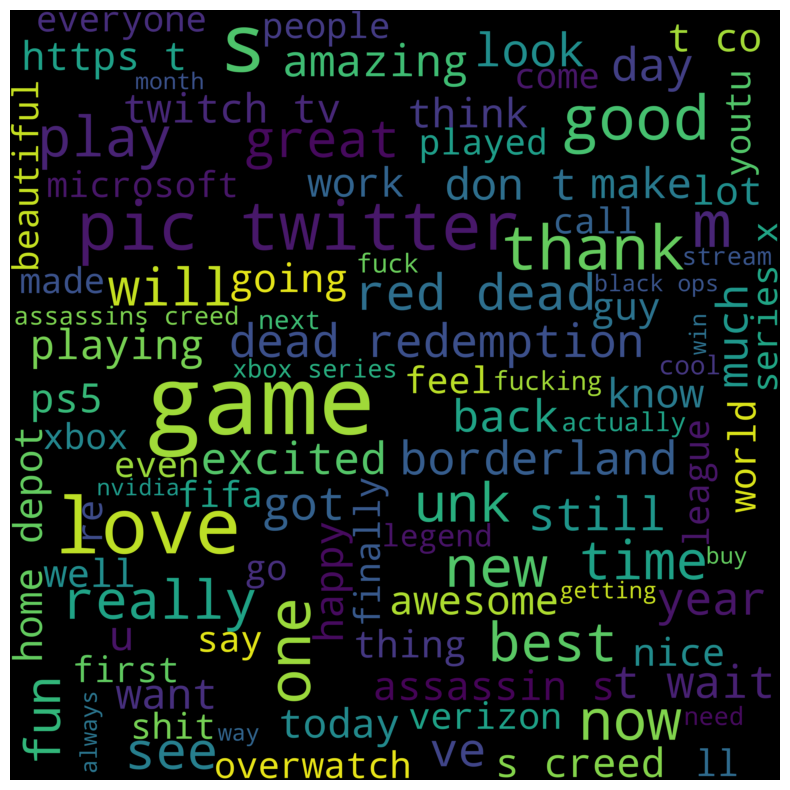

In [13]:
word_cloud_text = ' '.join(train_data['cleaned_tweet'][train_data['label']=='Positive'])
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Plotting wordcloud of negative tweets

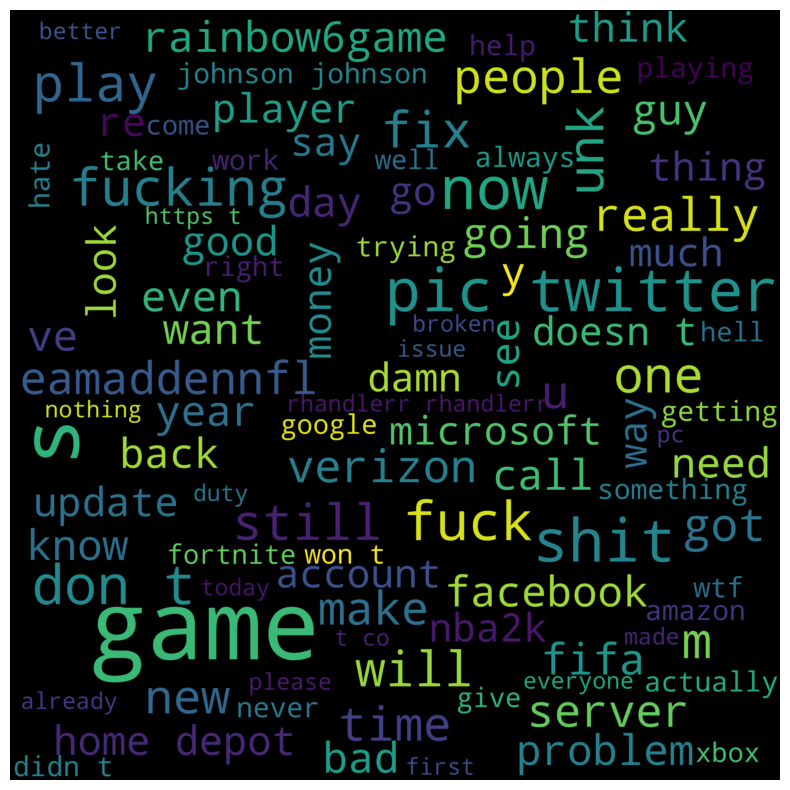

In [14]:
word_cloud_text = ' '.join(train_data['cleaned_tweet'][train_data['label']=='Negative'])
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Plotting wordcloud for neutral tweets

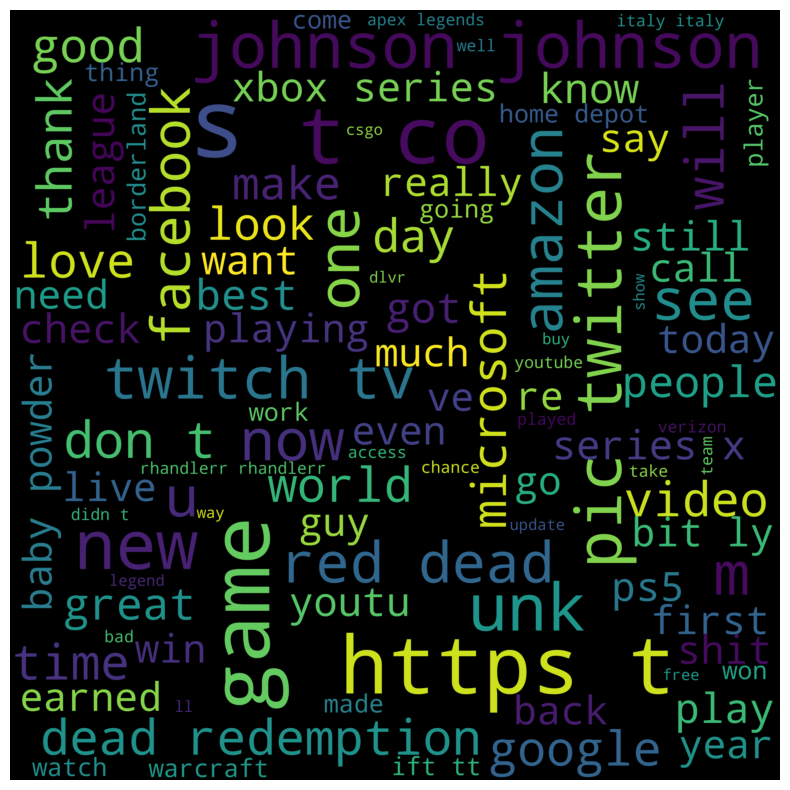

In [15]:
word_cloud_text = ' '.join(train_data['cleaned_tweet'][train_data['label']=='Neutral'])
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Plotting wordcloud for irrelevant tweets

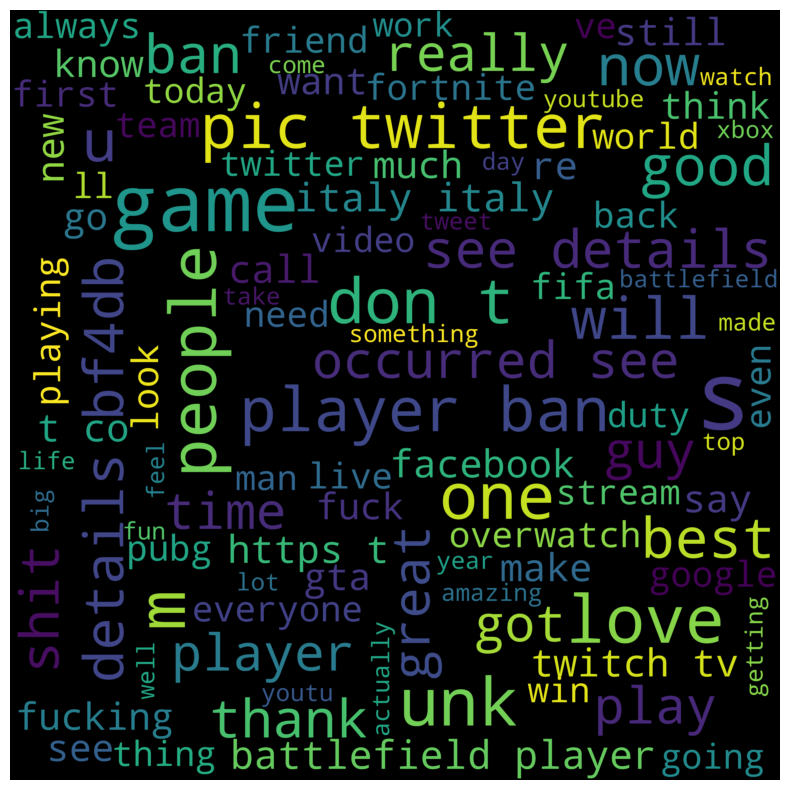

In [16]:
word_cloud_text = ' '.join(train_data['cleaned_tweet'][train_data['label']=='Irrelevant'])
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [17]:
#Count information per category
plot1=train_data.groupby(by=["information","label"]).count().reset_index()
plot1.head()

,information,label,id,tweet,cleaned_tweet
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


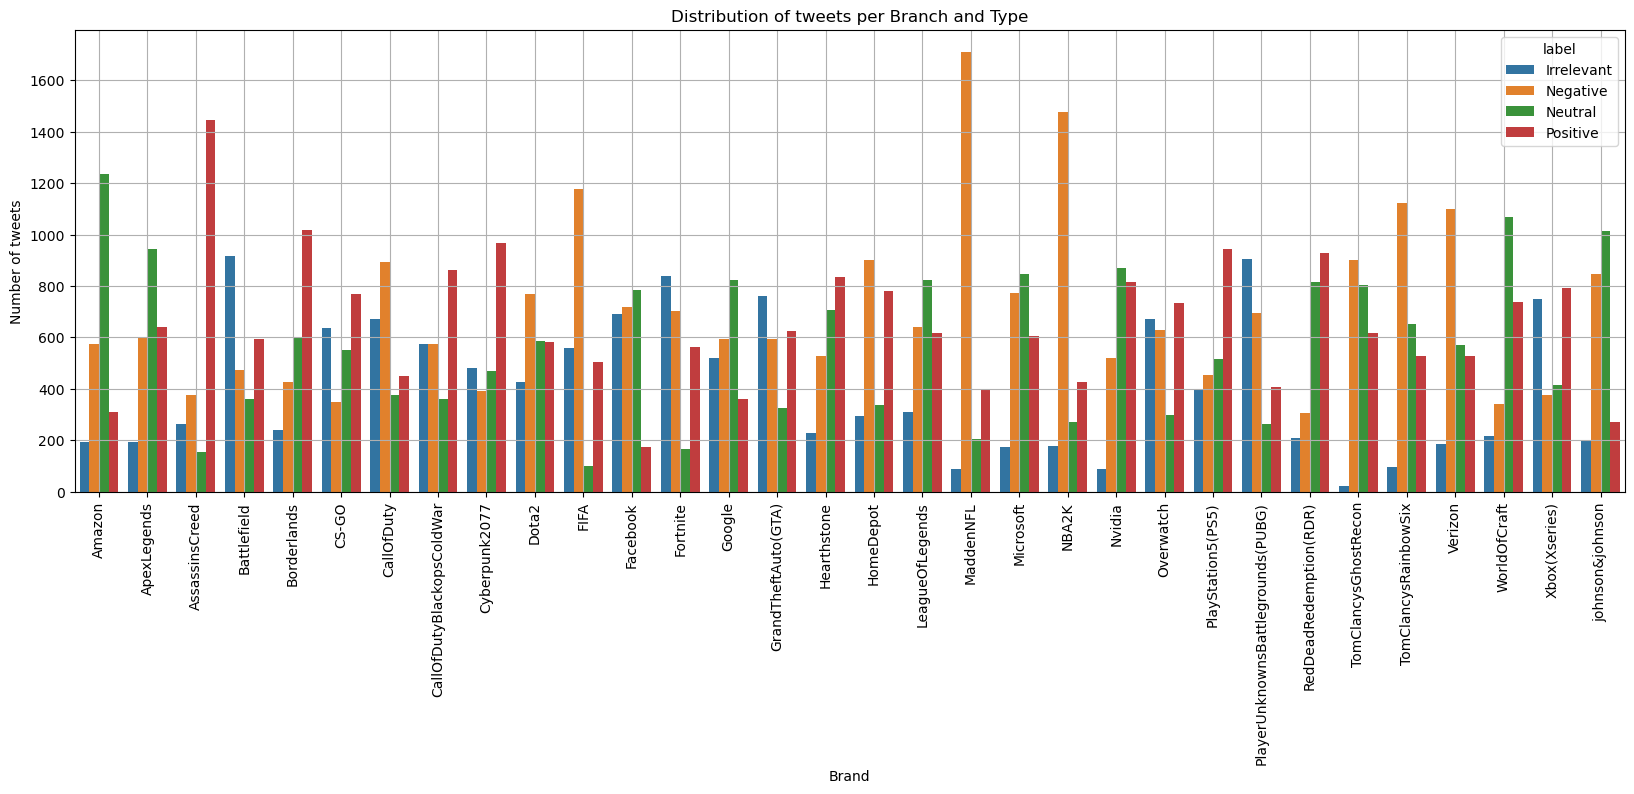

In [19]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="label")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

# Text Analysis

In [20]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data['cleaned_tweet']]
tokens_counter=[]
for text in tokens_text:
    for word in text:
        tokens_counter.append(word)
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


In [21]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)
bow=bow_counts.fit_transform(train_data['cleaned_tweet'])

In [25]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(train_data['cleaned_tweet'])
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(test_data['cleaned_tweet'])

In [27]:
#Labels for train and test encoding
y_train_bow = train_data['label']
y_test_bow = test_data['label']

# Logistic Regression Model

In [28]:
model=LogisticRegression(C=0.5, solver="liblinear",max_iter=1500)

In [29]:
model.fit(X_train_bow ,y_train_bow)

LogisticRegression(C=0.5, max_iter=1500, solver='liblinear')

In [31]:
# Prediction for testing data
test_pred = model.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  92.8928928928929


# Random Forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [35]:
model1.fit(X_train_bow ,y_train_bow)

RandomForestClassifier(random_state=42)

In [36]:
# Prediction for testing data
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  95.995995995996


In [37]:
import pickle

In [38]:
from pickle import dump

In [39]:
file_name_pkl = "C:/Users/snehi/Documents/Projects_ML/logistic_regression_clf.pkl"
with open(file_name_pkl, 'wb') as file:  
    pickle.dump(model, file)

In [40]:
file_name_pkl = "C:/Users/snehi/Documents/Projects_ML/random_forest_clf.pkl"
with open(file_name_pkl, 'wb') as file:  
    pickle.dump(model1, file)

In [41]:
file_name_pkl = "C:/Users/snehi/Documents/Projects_ML/bag_of_words.pkl"
with open(file_name_pkl, 'wb') as file:  
    pickle.dump(bow_counts, file)